# Motivation

The music industry is a industry made up not only by the artists who perform, but also a huge network of collaborators who contribute to their work, the songwriters and producers. Award ceremonies like the Grammys represent key milestones in artists’ careers and offer a natural starting point for exploring deeper patterns of collaboration and influence within the industry. 

In this project, we focus on the top Grammy categories: Album of the Year, Record of the Year, Song of the Year, and Best New Artist, because these categories are genre-agnostic and represent the most culturally significant and commercially visible names in music. By starting with these nominees, we aim to construct two graphs, one to explore the writers, where the nodes are writers, and an edge represents two writers who have both worked on the same artist's discography, the other graph will explore the artists, where nodes are artists, and an edge represents two artists who have worked with the same writer. We will explore how the trends in data evolves and changes over decades, so we make a different graph for each decade. Our goal is to uncover how closely connected the top tier of the music world really is.
Finally, we’ll gather lyrics from a handful of songs written by each of our songwriter communities and look at the words and themes that pop up most often. By creating simple visual summaries like word clouds and scanning for recurring ideas or phrases, we hope to see whether artists who share the same writers also share a similar lyrical “voice.” This way, we not only map out who works with whom, but also explore how those creative partnerships might shape the stories and emotions in the music itself.

---

## Basic Stats

In total, we gathered 547 unique artists across all five Grammy nominee categories, after removing duplicates. We then used MusicBrainz to retrieve metadata for each artist’s full discography, using their public docker to access the data. For each release, we extracted information about associated writers, which led to a large-scale mapping of the songwriter landscape. Lastly we used the lyrics.ovh API to collect lyrics for furter analysis.

We ended up with three core datasets:
- **Artist dataset** — containing name, type (person/group), gender (when available), and year of debut.
- **Song dataset** — one row per song, including title, artist ID, release year, and duration.
- **Writership dataset** — one row per writer-song connection, including role (composer, lyricist, writer, etc.).

Below are some summary statistics from our data:

### Artists
- Total unique artists: **547**
- Artist types: 383 persons, 163 groups, 1 other
- Share with known gender: **70%**
- Share with known debut year: **98%**

### Songs
- Total unique songs: **687,306**
- Average duration: **266.2 seconds** (~4.4 minutes)
- Share of songs with known release year: **84%**
- Share with missing duration: **15%**
- Share with missing ISRC code: **84%**

### Writers
- Unique writer IDs: **290,553**
- Total writer-song links: **6,231,716**
- Most common roles:
  - Composer: **5.88 million**
  - Writer: **3.50 million**
  - Lyricist: **2.86 million**
  - Librettist: **180,106**
  
An important note is that our writership dataset is not limited to songs released by artists in our artist dataset. When using the dataset, we only collect recording IDs associated with artists from our selected artist list. It is also worth noting that a writer can be credited with multiple roles on a single song, which is why the total number of roles exceeds the number of unique writer IDs.

### Lyrics
- Total lyrics collected: **593 songs**
- Source: Lyrics.ovh API
- Max 20 lyrics sampled per artist community
- Used for: TF–IDF word clouds and sentiment analysis


---

## Network Construction and Decade Splits

We actually built three different networks. Two of them are **artist–artist** graphs, where each node is an artist and an edge connects two artists if they share at least one songwriter. We then split each network into seven decade specific snapshots. To assign artists to decades we used two approaches:

1. **Decade of first release**  
   Artists are grouped by the decade in which they debuted. This gives a clean “cohort” view showing exactly when newcomers entered the scene and with whom they first collaborated. It also keeps each decade’s network balanced, since it avoids lumping prolific later career artists into later snapshots.

2. **Decade of greatest output**  
   Artists are grouped by the decade in which they released the most songs. This highlights when they were most active or influential, capturing their peak collaboration period even if that comes after their debut.

By comparing these two splits, we gain complementary insights into how songwriting collaborations shape the music world over time.

### Writer–Writer Network

The third network we constructed complements our artist–artist graphs by shifting the focus to the songwriters themselves. In this **writer–writer** network:

- **Nodes**  
  Represent individual songwriters.

- **Edges**  
  Connect two writers whenever they share credit on one or more recordings.  
  Edge weights reflect the number of co-writing collaborations.

- **Purpose**  
  While our primary analyses centered on how artists are linked by shared songwriters, this network lets us examine the underlying creative partnerships directly. It reveals:
  1. **Clusters of frequent collaborators** – groups of writers who repeatedly work together.  
  2. **Bridge songwriters** – individuals who link otherwise separate songwriting communities.  
  3. **Evolutionary patterns** – how writing teams form, dissolve, and reconfigure across decades.


Overall, this multi-layered approach combining artist–artist and writer–writer perspectives enables a richer, more nuanced understanding of collaboration in the music industry.

We began by framing our research question in social network terms: How are top-tier artists connected via the songwriters who collaborate on their work, and how do those patterns change over time?
- We projected a bipartite artist–writer graph into an **artist–artist** network for each decade (either by earliest release or by most prolific decade).  
- We applied the Louvain community detection algorithm to uncover clusters of artists sharing a tight-knit pool of writers.  
- To move from “what the clusters are” to “what they mean,” we computed classic network measures degree distribution, density, clustering coefficient, component structure and centrality (degree, betweenness, eigenvector) for each decade and for each community subgraph.  
- These statistics translate abstract graph structure into interpretable insights:  
  - **Cohesion:** How tightly connected is the scene?  
  - **Bridging:** Which artists serve as “bridges” between otherwise separate groups?  
  - **Influence:** Which artists act as local or global hubs

We have collected a broad amount of statistic from our two networks. The first table shown here is from the network based on an artist debut decade. The secound table is from the network based on the artist most active decade
<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>nodes</th>
      <th>edges</th>
      <th>avg_degree</th>
      <th>median_degree</th>
      <th>degree_gini</th>
      <th>density</th>
      <th>avg_clustering</th>
      <th>assortativity_deg</th>
      <th>avg_path_length</th>
      <th>diameter</th>
      <th>n_communities</th>
      <th>modularity</th>
      <th>top_writers</th>
    </tr>
    <tr>
      <th>decade</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1960s</th>
      <td>59</td>
      <td>471</td>
      <td>15.966</td>
      <td>15.0</td>
      <td>0.406</td>
      <td>0.275</td>
      <td>0.698</td>
      <td>-0.184</td>
      <td>1.877</td>
      <td>4</td>
      <td>5</td>
      <td>0.109</td>
      <td>56cd15a1-0d74-438b-8244-c96ffe1cae03:246, a85c...</td>
    </tr>
    <tr>
      <th>1970s</th>
      <td>45</td>
      <td>155</td>
      <td>6.889</td>
      <td>5.0</td>
      <td>0.454</td>
      <td>0.157</td>
      <td>0.475</td>
      <td>-0.166</td>
      <td>2.361</td>
      <td>5</td>
      <td>5</td>
      <td>0.210</td>
      <td>ed333e8b-d18a-49fc-b361-4ec9731dfdba:48, 0f468...</td>
    </tr>
    <tr>
      <th>1980s</th>
      <td>39</td>
      <td>76</td>
      <td>3.897</td>
      <td>3.0</td>
      <td>0.407</td>
      <td>0.103</td>
      <td>0.370</td>
      <td>-0.162</td>
      <td>2.683</td>
      <td>5</td>
      <td>4</td>
      <td>0.498</td>
      <td>a3cb23fc-acd3-4ce0-8f36-1e5aa6a18432:21, 401c3...</td>
    </tr>
    <tr>
      <th>1990s</th>
      <td>58</td>
      <td>232</td>
      <td>8.000</td>
      <td>6.0</td>
      <td>0.446</td>
      <td>0.140</td>
      <td>0.597</td>
      <td>-0.193</td>
      <td>2.309</td>
      <td>6</td>
      <td>5</td>
      <td>0.306</td>
      <td>494e8d09-f85b-4543-892f-a5096aed1cd4:116, db76...</td>
    </tr>
    <tr>
      <th>2000s</th>
      <td>45</td>
      <td>172</td>
      <td>7.644</td>
      <td>6.0</td>
      <td>0.350</td>
      <td>0.174</td>
      <td>0.438</td>
      <td>-0.080</td>
      <td>2.243</td>
      <td>5</td>
      <td>3</td>
      <td>0.320</td>
      <td>73e5e69d-3554-40d8-8516-00cb38737a1c:50, d339e...</td>
    </tr>
    <tr>
      <th>2010s</th>
      <td>62</td>
      <td>301</td>
      <td>9.710</td>
      <td>8.5</td>
      <td>0.430</td>
      <td>0.159</td>
      <td>0.479</td>
      <td>-0.118</td>
      <td>2.232</td>
      <td>5</td>
      <td>4</td>
      <td>0.240</td>
      <td>6f1a58bf-9b1b-49cf-a44a-6cefad7ae04f:91, 28737...</td>
    </tr>
  </tbody>
</table>
</div>

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>nodes</th>
      <th>edges</th>
      <th>avg_degree</th>
      <th>median_degree</th>
      <th>degree_gini</th>
      <th>density</th>
      <th>avg_clustering</th>
      <th>assortativity_deg</th>
      <th>avg_path_length</th>
      <th>diameter</th>
      <th>n_communities</th>
      <th>modularity</th>
      <th>top_writers</th>
    </tr>
    <tr>
      <th>decade</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1960s</th>
      <td>9</td>
      <td>15</td>
      <td>3.333</td>
      <td>3.0</td>
      <td>0.281</td>
      <td>0.417</td>
      <td>0.589</td>
      <td>-0.558</td>
      <td>1.639</td>
      <td>3</td>
      <td>2</td>
      <td>0.222</td>
      <td>e7495426-6e14-4429-b647-dbe700ad57d4:27, bc4ca...</td>
    </tr>
    <tr>
      <th>1970s</th>
      <td>5</td>
      <td>7</td>
      <td>2.800</td>
      <td>3.0</td>
      <td>0.143</td>
      <td>0.700</td>
      <td>0.767</td>
      <td>-0.500</td>
      <td>1.300</td>
      <td>2</td>
      <td>2</td>
      <td>-0.219</td>
      <td>354812d4-2dfb-4611-9a8f-8f8e795e48bf:33, 79251...</td>
    </tr>
    <tr>
      <th>1980s</th>
      <td>2</td>
      <td>1</td>
      <td>1.000</td>
      <td>1.0</td>
      <td>0.000</td>
      <td>1.000</td>
      <td>0.000</td>
      <td>NaN</td>
      <td>1.000</td>
      <td>1</td>
      <td>1</td>
      <td>0.000</td>
      <td>7b004920-b04e-4ff2-b2e5-55d8f1cc0522:4, 8439a3...</td>
    </tr>
    <tr>
      <th>1990s</th>
      <td>78</td>
      <td>1143</td>
      <td>29.308</td>
      <td>30.5</td>
      <td>0.334</td>
      <td>0.381</td>
      <td>0.743</td>
      <td>-0.200</td>
      <td>1.646</td>
      <td>3</td>
      <td>3</td>
      <td>0.086</td>
      <td>c3d14b41-a48d-488f-bfed-ce0597bb0b1f:437, 05ec...</td>
    </tr>
    <tr>
      <th>2000s</th>
      <td>195</td>
      <td>5959</td>
      <td>61.118</td>
      <td>58.0</td>
      <td>0.372</td>
      <td>0.315</td>
      <td>0.718</td>
      <td>-0.162</td>
      <td>1.727</td>
      <td>4</td>
      <td>3</td>
      <td>0.141</td>
      <td>197450cd-0124-4164-b723-3c22dd16494d:2260, fbe...</td>
    </tr>
    <tr>
      <th>2010s</th>
      <td>137</td>
      <td>2682</td>
      <td>39.153</td>
      <td>35.0</td>
      <td>0.353</td>
      <td>0.288</td>
      <td>0.686</td>
      <td>-0.142</td>
      <td>1.761</td>
      <td>3</td>
      <td>3</td>
      <td>0.282</td>
      <td>48896dee-a985-424d-9849-84802f7e79c9:900, 8be0...</td>
    </tr>
    <tr>
      <th>2020s</th>
      <td>73</td>
      <td>568</td>
      <td>15.562</td>
      <td>15.0</td>
      <td>0.379</td>
      <td>0.216</td>
      <td>0.597</td>
      <td>-0.110</td>
      <td>1.974</td>
      <td>4</td>
      <td>3</td>
      <td>0.214</td>
      <td>6f1a58bf-9b1b-49cf-a44a-6cefad7ae04f:139, 2729...</td>
    </tr>
  </tbody>
</table>
</div>

From here we can draw different conclusions 

#### 1. **Collaboration Has Intensified Among Top Artists**

Both versions of the artist–artist network whether based on decade of first release or of peak output show that collaboration via shared songwriters has grown dramatically since the 1990s. In the 2000s, the network built on peak output includes nearly 200 artists with over 5,900 edges, compared to just 78 artists and 1,100 edges in the 1990s. This suggests that artists increasingly draw from a shared pool of professional songwriters, resulting in a denser and more interconnected top tier of the music industry.

Moreover, we find that networks grouped by decade of greatest output are more densely connected and exhibit lower modularity, implying that artists are collaborating more widely across stylistic or generational boundaries during their most active periods. In contrast, grouping by debut decade reveals more modular, cohort like structures capturing the early, formative connections of artists entering the scene together.

#### 2. **Songwriters Form Tight-Knit, Fragmented Communities**

The writer–writer network paints a different picture. While the number of active songwriters and co-writing relationships increases over time—especially in the 2000s—the overall network remains sparse, with low density and many disconnected components. This implies that although more writers are involved in the industry, most co-write with only a few peers.

However, clustering increases significantly over the decades, suggesting that songwriters are increasingly working within tight-knit writing teams. These teams appear to operate in silos, as shown by the high modularity scores: in the 2000s, the network fragments into nearly 600 communities. Unlike the artist–artist network, which becomes more connected over time, the writer–writer space remains highly segmented, even as it grows in size.

#### 3. **From Elitist Cliques to Broad Collaboration**

Another notable shift appears in the assortativity of the writer–writer network. In earlier decades (1960s–1980s), high-degree nodes (prolific writers) mostly collaborated with each other—reflecting tight elite circles. But this pattern erodes in later decades: by the 2000s, assortativity drops sharply, indicating that top writers increasingly work with newcomers or lower-degree peers. This suggests a more democratized and open songwriting ecosystem, where influence is distributed more broadly.

Taken together, these findings suggest a professionalization and centralization of the songwriting process in recent decades, where a growing but fragmented population of writers supports a highly interconnected network of marquee artists. Collaboration is now both more frequent and more strategic, with songwriters forming specialized teams that help shape the musical voices of a wider range of performers.

The writer–writer network becomes more modular over time indicates that the writers increasingly work in small, stable teams that co-write together. These teams form tight communities with few links between them. In contrast, the artist–artist network becomes less modular because more artists collaborate with the same popular writers, creating connections across otherwise separate groups. This leads to more overlap and fewer clear clusters among artists.

---

## Text Processing & Analysis
On the text side, we fetched lyrics via Lyrics.ovh and carried out careful preprocessing:  
1. **Unicode & Punctuation Normalization**  
   - Lowercasing, stripping accents, removing all non-word characters.  
2. **Section-Header Removal**  
   - Regular expressions to delete `[…]` blocks and lines like `“Verse 1:”` or `“Chorus:”`.  
3. **Token Filtering**  
   - Standard English stopwords, musical fillers (`la`, `oh`, etc.), plus each artist’s own name tokens to avoid biasing term frequencies.

With our cleaned corpus for each community, we generated:  
- **TF–IDF-weighted word clouds** (via scikit-learn) to surface the most distinctive vocabulary  
- **Sentiment analysis** (using VADER) to compute an average “mood” per community   

Together, these techniques let us compare not only who is connected to whom, but what they’re writing about and how they feel over time.

By combining network-science metrics with these text-analysis pipelines, we turn raw discographic and lyric data into a coherent narrative about how creative collaboration and lyrical content co-evolve across decades.  


We analyzed word clouds from both artist networks—grouped by first release and by most active decade—to uncover lyrical trends over time. To complement the visual themes, we also computed average sentiment scores per community and decade using the VADER sentiment analyzer.
Here are our sentiment graphs

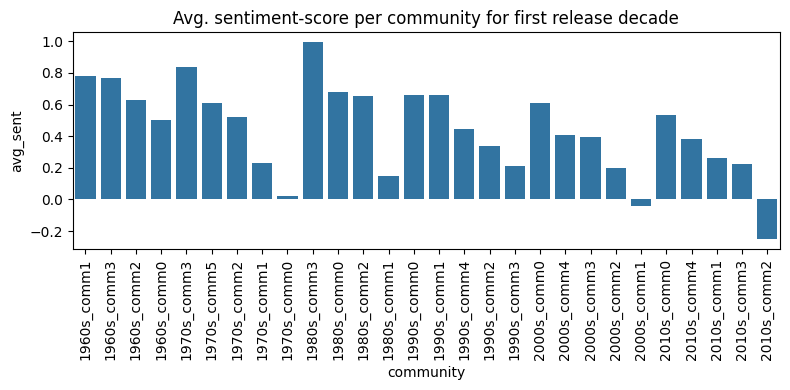
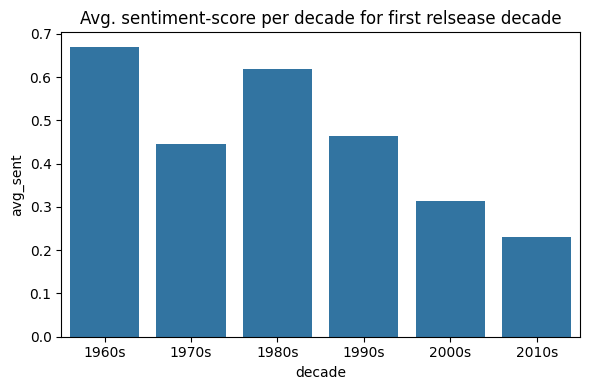
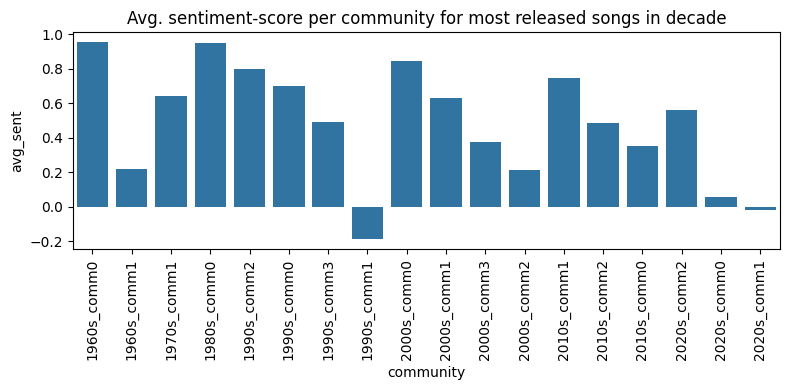
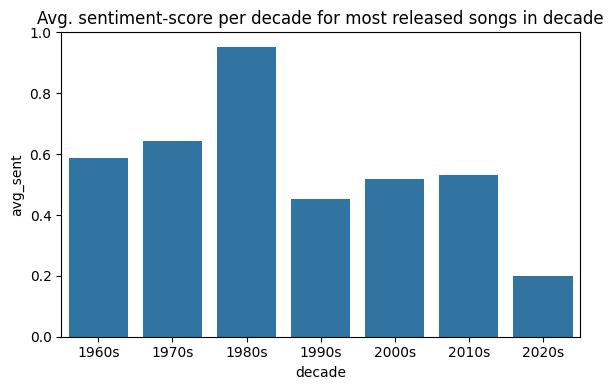

### General Trends by Decade

- **1960s–1970s**: Lyrics emphasize love, nature, and poetic emotion. Words like *love*, *heart*, *dear*, *spring*, and *rose* dominate. Some communities also include playful or nostalgic objects (*christmas*, *pajamas*, *radio*). Sentiment scores in these decades are generally **high**, especially in the 1980s.

- **1980s**: Themes become more introspective and emotional. Terms like *doubt*, *mind*, *survive*, and *break* reflect personal struggle—but still with strong emotional expression. This decade shows the highest average sentiment in both network groupings.

- **1990s**: Romantic and reflective language continues, but becomes more grounded. Frequent words like *baby*, *real*, *home*, and *day* reflect intimacy with realism. Sentiment begins to drop slightly, especially in certain communities.

- **2000s**: Lyrics shift toward rhythm and repetition. Common words include *get*, *yeah*, *never*, *like*, and *wanna*. Sentiment scores become more varied across communities, with both optimistic and neutral tones.

- **2010s–2020s**: Language becomes more casual, expressive, and raw. We see more slang and performance fillers (*fuckin*, *bitch*, *ayy*, *yeah*, *ooh*), as well as themes of self-expression (*wanna*, *know*, *keep*, *play*). Sentiment scores show a steady decline, with several communities scoring near or below neutral—especially in the 2020s.

### Differences Between the Two Network Groupings

#### First Release Network
- Communities are more cohesive in tone and vocabulary across decades.
- Sentiment follows a smooth trajectory from optimistic (1960s–80s) to more neutral or negative (2000s–2020s).
- Earlier communities use romantic and symbolic language; later ones shift toward informal tone and realism.

#### Most Active Decade Network
- Communities are more stylistically fragmented.
- Sentiment scores are less consistent—some peak-period communities remain highly positive while others drop sharply.
- Later decades (2000s–2020s) show greater variation in mood, reflecting broader stylistic diversity and genre blending.

### Summary

Across both network types, we observe a clear temporal shift in lyrical style and sentiment. Early decades emphasize emotion and poetic themes, while recent decades move toward rhythm, repetition, and informal language. The first release grouping preserves lyrical continuity and cohort identity, whereas the most active grouping reflects dynamic stylistic shifts tied to genre and popularity trends.

The sentiment analysis confirms this trend: as lyrics become more casual and expressive, their emotional polarity tends to flatten or decline, suggesting a broader change in how emotion is conveyed in popular music.

---

# Discussion


Overall, our project succeeded in building meaningful network representations of the music industry. The decade-based community detection revealed clear patterns of collaboration, and combining this with lyrics analysis gave us insight into not just who works with whom, but also what they write about.

One major limitation is the Lyrics.ovh API. Even though we implemented an iterative approach to sampling, we were often limited by missing data—some songs simply didn’t exist in the API, regardless of how we queried them.

What worked well was the modularity of our pipeline. Each part—network construction, community detection, and lyric collection—could be independently tested and adjusted. This made it easy to experiment with improvements along the way.

In future work, we could enrich the project by analyzing other aspects of songs, such as sentiment or lyrical complexity. We could also explore how communities evolve across decades, rather than treating them as separate snapshots. Despite some data constraints, the project offers a strong foundation for studying collaboration and content in popular music.
